# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [0]:
!wget https://www.cse.buffalo.edu/ubds/docs/AI_quick_draw.pickle

--2020-04-13 03:35:11--  https://www.cse.buffalo.edu/ubds/docs/AI_quick_draw.pickle
Resolving www.cse.buffalo.edu (www.cse.buffalo.edu)... 128.205.32.52
Connecting to www.cse.buffalo.edu (www.cse.buffalo.edu)|128.205.32.52|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cse.buffalo.edu/ubds/docs/AI_quick_draw.pickle [following]
--2020-04-13 03:35:12--  https://cse.buffalo.edu/ubds/docs/AI_quick_draw.pickle
Resolving cse.buffalo.edu (cse.buffalo.edu)... 128.205.32.52
Connecting to cse.buffalo.edu (cse.buffalo.edu)|128.205.32.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99000646 (94M)
Saving to: ‘AI_quick_draw.pickle.1’

AI_quick_draw.pickl 100%[===================>]  94.41M  32.4MB/s    in 2.9s    

2020-04-13 03:35:15 (32.4 MB/s) - ‘AI_quick_draw.pickle.1’ saved [99000646/99000646]



In [0]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [0]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [0]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    #data_train = resize_images(data_train, (20,20))
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    #data_test = resize_images(data_test, (20,20))
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

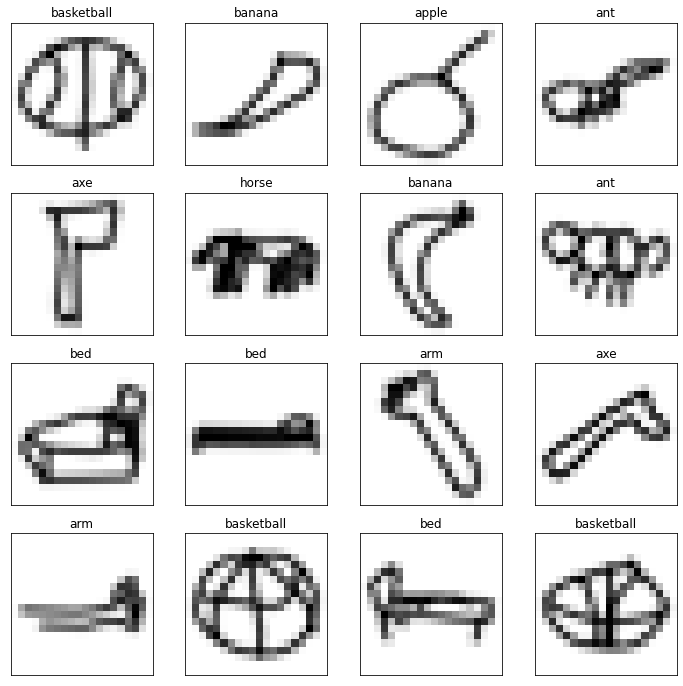

In [0]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    plt.imshow(data_train[ind,:].reshape((28,28)),cmap='Greys')
    #plt.imshow(data_train[ind,:].reshape((20,20)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [0]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [0]:
%%time

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
#model.add(Dense(256, activation='relu')) # hidden 2
#model.add(Dense(256, activation='relu')) # hidden 3
#model.add(Dense(256, activation='relu')) # hidden 4
#model.add(Dense(256, activation='relu')) # hidden 5
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)

Epoch 1/500
100000/100000 [==============================] - 7s 71us/step - loss: 3.2780 - accuracy: 0.6373
Epoch 2/500
100000/100000 [==============================] - 7s 69us/step - loss: 1.2917 - accuracy: 0.7103
Epoch 3/500
100000/100000 [==============================] - 7s 70us/step - loss: 1.2673 - accuracy: 0.7252
Epoch 4/500
100000/100000 [==============================] - 7s 69us/step - loss: 1.2673 - accuracy: 0.7336
Epoch 5/500
100000/100000 [==============================] - 7s 74us/step - loss: 1.2738 - accuracy: 0.7394
Epoch 6/500
100000/100000 [==============================] - 7s 74us/step - loss: 1.2710 - accuracy: 0.7418
Epoch 7/500
100000/100000 [==============================] - 7s 69us/step - loss: 1.2898 - accuracy: 0.7421
Epoch 8/500
100000/100000 [==============================] - 7s 68us/step - loss: 1.2723 - accuracy: 0.7432
Epoch 9/500
100000/100000 [==============================] - 7s 70us/step - loss: 1.2933 - accuracy: 0.7441
Epoch 10/500
100000/100000 [

In [0]:
# save the model to use with the drawing app (this will be released later)
model.save('/content/gdrive/My Drive/Colab Notebooks/pa2-part2-model20.h5') #saving 20x20 model

In [0]:
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))

Testing accuracy 0.66412


In [0]:
from keras.models import load_model
model = load_model('/content/gdrive/My Drive/Colab Notebooks/pa2-part2-model20.h5')